# Importing Necessary Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.style.use('seaborn')

# Importing the Data

In [22]:
df = pd.read_csv('adult.data')
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [23]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [24]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Cleaning And Augmenting the DataSet

In [26]:
df_clean = df.replace(to_replace='?',value = np.nan)
df_clean = df_clean.fillna(value = df_clean.median())
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Encoding the Dataset

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country','salary']
for i in columns_to_encode:
    df_clean[i] = le.fit_transform(df_clean[i].astype(str))

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   workclass       32560 non-null  int32
 2   fnlwgt          32560 non-null  int64
 3   education       32560 non-null  int32
 4   education-num   32560 non-null  int64
 5   marital-status  32560 non-null  int32
 6   occupation      32560 non-null  int32
 7   relationship    32560 non-null  int32
 8   race            32560 non-null  int32
 9   sex             32560 non-null  int32
 10  capital-gain    32560 non-null  int64
 11  capital-loss    32560 non-null  int64
 12  hours-per-week  32560 non-null  int64
 13  native-country  32560 non-null  int32
 14  salary          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


# Data Visualization

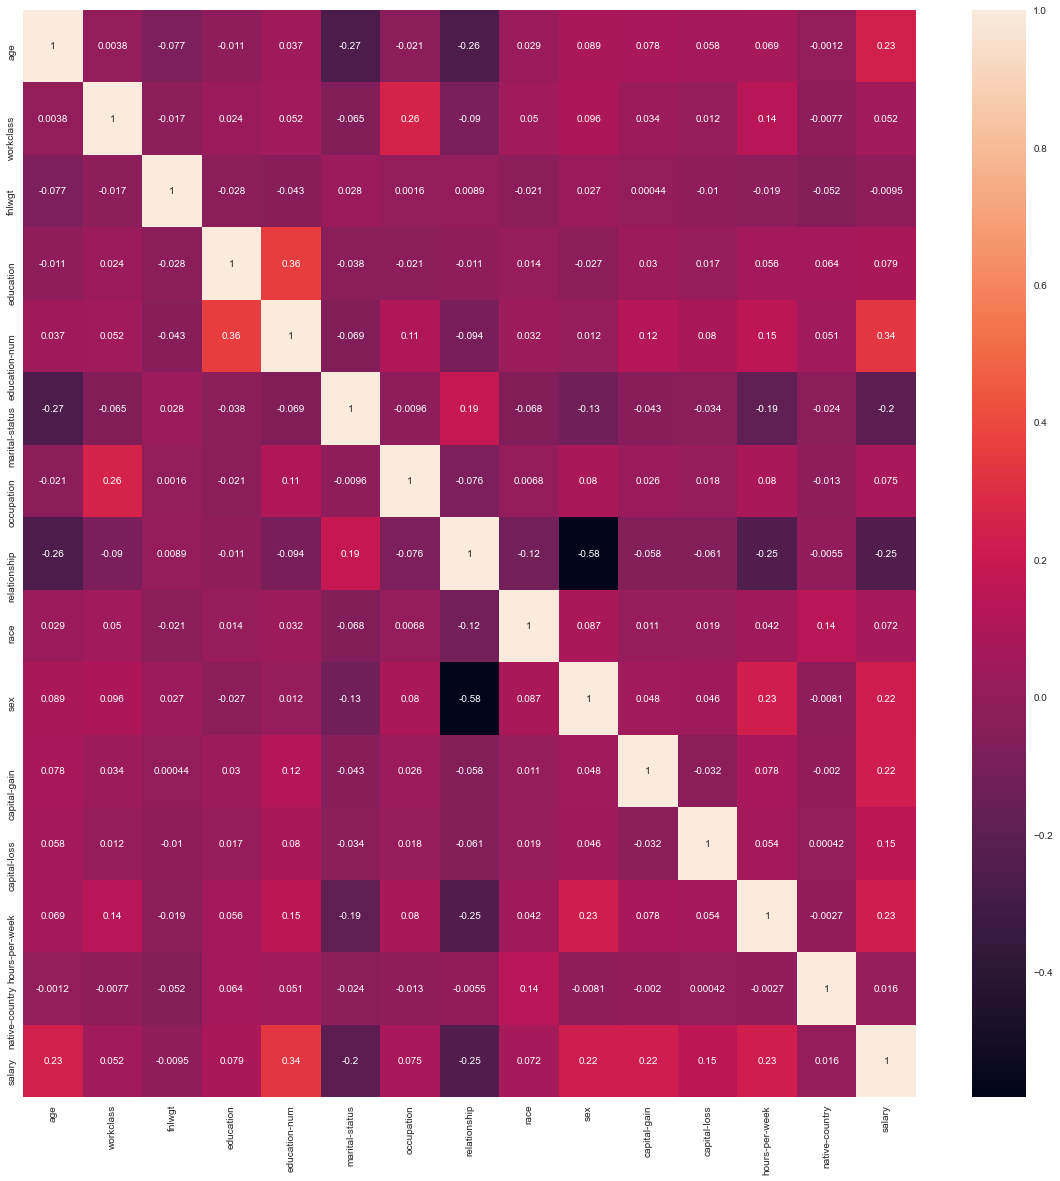

In [29]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(),annot=True)
plt.show()

In [30]:
columns_to_drop = ['workclass','fnlwgt','education','occupation','race','native-country']
df = df_clean.drop(columns_to_drop,axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   education-num   32560 non-null  int64
 2   marital-status  32560 non-null  int32
 3   relationship    32560 non-null  int32
 4   sex             32560 non-null  int32
 5   capital-gain    32560 non-null  int64
 6   capital-loss    32560 non-null  int64
 7   hours-per-week  32560 non-null  int64
 8   salary          32560 non-null  int32
dtypes: int32(4), int64(5)
memory usage: 1.7 MB


# Splitting the Data

In [32]:
X,Y = df_clean.values[:,:-1],df_clean.values[:,-1]

In [33]:
X.shape,Y.shape

((32560, 14), (32560,))

# Normalisation and Standardisation

In [34]:
u = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X-u)/std

In [35]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(32560, 15)


# Creating Test Train Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Writing Error, Hypothesis and Gradient Function

In [37]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))
def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = -1*np.mean((y*np.log(hi) + ((1-y)*np.log(1-hi))))
    return e
def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = -(np.dot(X.T,(y-hi)))
    m = X.shape[0]
    return grad/m
def gradientDescent(X_,y,lr = 0.1, epochs = 300):
    # ones = np.ones((X.shape[0],1))
    # X_ = np.hstack((ones,X))
    y = y.reshape((-1,1))

    n = X_.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    for i in range(epochs):
        error_list.append(error(X_,y,theta))
        grad = gradient(X_,y,theta)
        theta = theta - lr*grad
    return theta,error_list

In [38]:
theta,err = gradientDescent(X,Y, lr=0.1,epochs=500)

# Plotting Error

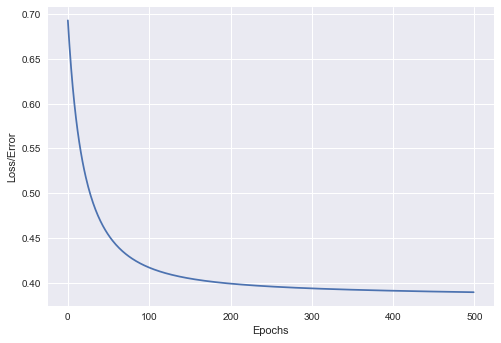

In [39]:
plt.plot(err)
plt.xlabel("Epochs")
plt.ylabel("Loss/Error")
plt.show()

# Predict Method

In [41]:
def predict(X_,theta):
    # ones = np.ones((X.shape[0],1))
    # X_ = np.hstack((ones,X))
    h = hypothesis(X_,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output
XT_pred = predict(X,theta)

# Plotting Confusion Matrix

In [42]:
CM = confusion_matrix(XT_pred, Y, labels=[1,0])
TP=CM[0][0]
FP=CM[0][1]
FN=CM[1][0]
TN=CM[1][1]

ACC = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy is : \n', ACC)
print('--------------------------------')
Rec = TP/(TP+FN)
print('Recall is : \n', Rec)
print('--------------------------------')
Prec = TP/(TP+FP)
print('Precsion is : \n', Prec)
print('--------------------------------')
F1 = 2 * ((Prec * Rec)/(Prec + Rec))
print('F1 score is : \n', F1)
print('--------------------------------')

Accuracy is : 
 0.8223280098280098
--------------------------------
Recall is : 
 0.4406325723759725
--------------------------------
Precsion is : 
 0.711784095591265
--------------------------------
F1 score is : 
 0.5443087829854274
--------------------------------


[]

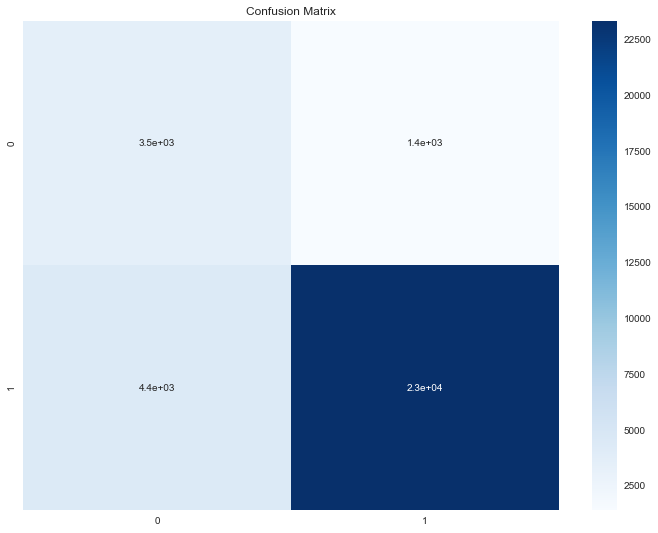

In [43]:
import seaborn as sns

plt.figure(figsize=(12,9))
plt.ticklabel_format(useOffset=False, style='plain')
plt.title("Confusion Matrix")
sns.heatmap(CM,annot=True,cmap=plt.cm.Blues)
plt.plot()

# ROC (Receiver Operating Characteristics) Curve

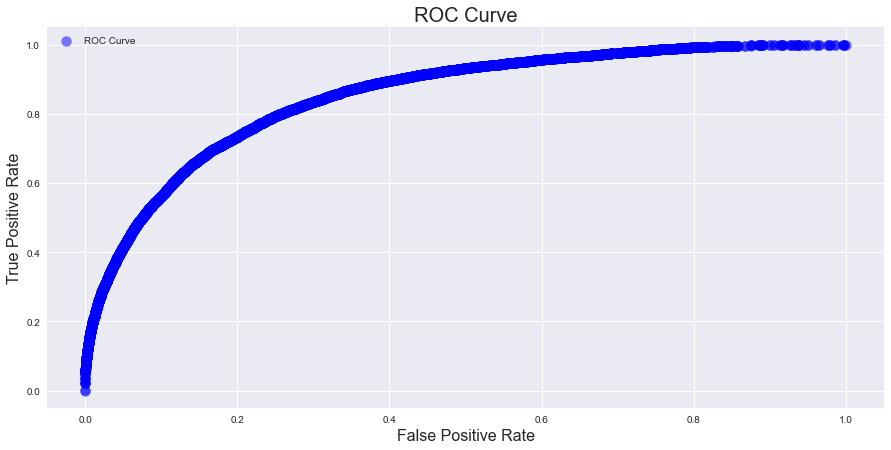

In [46]:
def probabilities(X_,theta):
    h = hypothesis(X_,theta)
    return h
prob_vector = probabilities(X,theta)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y, prob_vector)

plt.figure(figsize=(15, 7))
plt.scatter(fpr, tpr, s=100, alpha=0.5, color="blue", label="ROC Curve")
plt.title("ROC Curve", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.legend()
plt.show()